# Food Expenditures Time Series

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Settings

In [2]:
sns.set_theme(style="white")
colors = ["#5cafb5", "#914974"]
sns.set_palette(sns.color_palette(colors))
plt.rcParams['figure.figsize']=(18,6)

## Import and Prepare Data

In [3]:
path = 'monthly_sales.csv'
data = pd.read_csv(path, thousands=',')

In [4]:
data['date'] = pd.to_datetime(((data['year']).astype(int)).astype(str) + '-' + data['month'] + '-01', format='%Y-%B-%d')
data = data.sort_values(by='date')

In [5]:
data['Food at home'] = (data['const_fah'] - data['const_fah'].shift(12))
data['Food away from home'] = (data['const_fafh'] - data['const_fafh'].shift(12))

In [6]:
data_p = data[['date','Food at home']].melt(id_vars=['date'])

## Plot

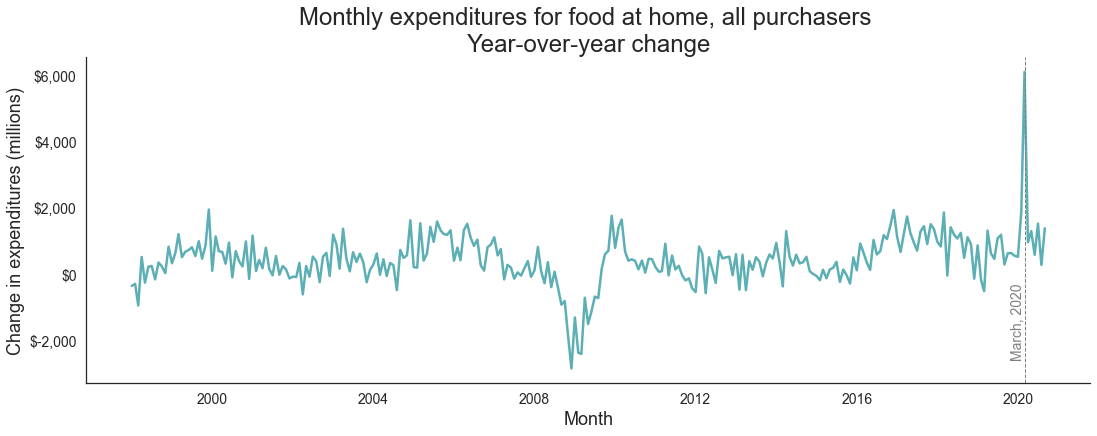

In [7]:
ax = sns.lineplot(data=data_p, 
                  x="date", y="value", hue='variable', 
                  linewidth=2.5, 
                  legend=False)
ax.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='--', lw=1)
style = dict(size=14, color='gray', rotation=90)
ax.text('2019-11-01', -2500, "March, 2020", **style)
ax.set_title("Monthly expenditures for food at home, all purchasers \nYear-over-year change",
            fontsize=24)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Change in expenditures (millions)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
plt.savefig('Monthly-food-sales.png')
plt.show()